In [1]:
# require: matplotlib, seaborn, pytraj
# how? "conda install matplotib seaborn"

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

%matplotlib inline

# add matplotlib and seaborn package
# http://matplotlib.org/
from matplotlib import pyplot as plt

# https://stanford.edu/~mwaskom/software/seaborn/index.html
import seaborn as sns

# use pytraj
import pytraj as pt

# call matrix module
from pytraj import matrix

# load trajectory from file
traj = pt.iterload('tz2.nc', 'tz2.parm7')
traj

<pytraj.TrajectoryIterator, 101 frames, include:
<Topology: 223 atoms, 13 residues, 1 mols, non-PBC>>
           

In [2]:
# calculate coordinate covariance matrix
mat = matrix.covar(traj, '@CA')

In [3]:
mat

array([[ 11.18702103,  -3.48995172,   0.57711937, ...,   2.97984903,
          8.53672269,   5.30533667],
       [ -3.48995172,   7.54542388,  -1.28398765, ...,  -1.5658132 ,
         -5.32436993,  -3.03733563],
       [  0.57711937,  -1.28398765,   3.36102527, ...,   0.01661629,
          0.24280744,   0.29085414],
       ..., 
       [  2.97984903,  -1.5658132 ,   0.01661629, ...,   3.09761025,
          3.20744347,   1.64045046],
       [  8.53672269,  -5.32436993,   0.24280744, ...,   3.20744347,
          9.89487394,   5.35030725],
       [  5.30533667,  -3.03733563,   0.29085414, ...,   1.64045046,
          5.35030725,   4.11786141]])

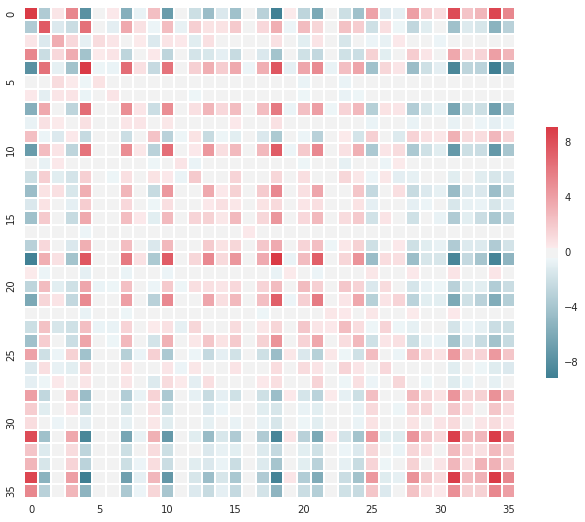

In [5]:
# adapted from: https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(mat, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
#plt.savefig('matrix_covar.png')